<a href="https://colab.research.google.com/github/beatrixvascc/Analise-de-dados-medicos/blob/main/MiniCursoINETSYS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Como usar o google colab e para o que serve

*   Essa ferramenta utiliza armazenamento na nuvem e suporta a linguagem python.
*   Você pode tanto escrever apenas texto, como estou fazendo, quanto programar em python.



Como exemplo, inicialmente vamos atribuir o valor 5 para a variavel "a" e imprimi-la:

In [ ]:
a=5
a

5

Agora podemos fazer operacoes, prestando atencao na hora de executar pois uma execucao na ordem errada pode gerar erro:

In [ ]:
a=a+10
a

15

In [ ]:
a=a*2

In [ ]:
a=a/5
a

6.0

#Base de dados MIMIC IV
Agora que vimos como funciona o google colab, podemos partir para a base que iremos usar. **baixe a base que enviamos no email*


##Sobre a base:

- registro medico eletronico de 2008 a 2019
- dividido em dois modulos: HOSP (informacoes gerais e demograficas, diagnosticos, datas, exames e procedimentos) e ICU (dados da UTI)

##Analise de dados

primeiro iremos focar em visualizar a tabela para analisar os dados.
Olhando a HEAD da tabela admissoes usando PANDAS:

In [2]:
import pandas as pd

arquivo = pd.read_csv("/content/admissions.csv.gz")    #le o arquivo
arquivo.head(10)     #mostra as 5 primeiras linhas

,subject_id,hadm_id,admittime,dischtime,deathtime,admission_type,admit_provider_id,admission_location,discharge_location,insurance,language,marital_status,race,edregtime,edouttime,hospital_expire_flag
0,10004235,24181354,2196-02-24 14:38:00,2196-03-04 14:02:00,NaN,URGENT,P03YMR,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicaid,ENGLISH,SINGLE,BLACK/CAPE VERDEAN,2196-02-24 12:15:00,2196-02-24 17:07:00,0
1,10009628,25926192,2153-09-17 17:08:00,2153-09-25 13:20:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicaid,?,MARRIED,HISPANIC/LATINO - PUERTO RICAN,NaN,NaN,0
2,10018081,23983182,2134-08-18 02:02:00,2134-08-23 19:35:00,NaN,URGENT,P233F6,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,WHITE,2134-08-17 16:24:00,2134-08-18 03:15:00,0
3,10006053,22942076,2111-11-13 23:39:00,2111-11-15 17:20:00,2111-11-15 17:20:00,URGENT,P38TI6,TRANSFER FROM HOSPITAL,DIED,Medicaid,ENGLISH,NaN,UNKNOWN,NaN,NaN,1
4,10031404,21606243,2113-08-04 18:46:00,2113-08-06 20:57:00,NaN,URGENT,P07HDB,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,WIDOWED,WHITE,NaN,NaN,0
5,10005817,20626031,2132-12-12 01:43:00,2132-12-20 15:04:00,NaN,URGENT,P41R5N,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Medicare,ENGLISH,MARRIED,WHITE,NaN,NaN,0
6,10019385,20297618,2180-02-15 20:28:00,2180-02-25 13:45:00,NaN,URGENT,P536JC,TRANSFER FROM HOSPITAL,HOME HEALTH CARE,Other,ENGLISH,MARRIED,WHITE,NaN,NaN,0
7,10002495,24982426,2141-05-22 20:17:00,2141-05-29 17:41:00,NaN,URGENT,P79SJ2,TRANSFER FROM HOSPITAL,SKILLED NURSING FACILITY,Medicare,ENGLISH,MARRIED,UNKNOWN,NaN,NaN,0
8,10038081,20755971,2115-09-27 20:40:00,2115-10-12 00:00:00,2115-10-12 22:20:00,URGENT,P48GIG,TRANSFER FROM HOSPITAL,DIED,Other,?,SINGLE,UNKNOWN,NaN,NaN,1
9,10019917,22585261,2182-01-07 23:25:00,2182-01-10 16:52:00,NaN,URGENT,P3529J,TRANSFER FROM HOSPITAL,HOME,Other,ENGLISH,SINGLE,OTHER,NaN,NaN,0


Agora visualizando a TAIL da pacientes:

In [ ]:
arquivo = pd.read_csv("/content/patients.csv.gz")
arquivo.tail(6)     #mostra as ultimas 5 linhas

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
94,10012552,M,78,2140,2014 - 2016,NaN
95,10004733,M,51,2174,2014 - 2016,NaN
96,10021118,M,62,2161,2014 - 2016,NaN
97,10018501,M,83,2141,2014 - 2016,NaN
98,10007058,M,48,2167,2014 - 2016,NaN
99,10038992,M,70,2185,2014 - 2016,NaN


e possivel usar o DataFrame do Pandas que e parecido com uma tabela em SQL para selecionar apenas as colunas numericas, usando de exemplo a tabela acima:

In [ ]:
arquivo = pd.read_csv("/content/patients.csv.gz")
df = pd.DataFrame(arquivo)    #cria um dataFrame
df.select_dtypes(include='number').head()    #retorna as colunas numericas

,subject_id,anchor_age,anchor_year
0,10014729,21,2125
1,10003400,72,2134
2,10002428,80,2155
3,10032725,38,2143
4,10027445,48,2142


Para verificar os valores ausentes e elimina-los podemos fazer:

In [ ]:
df.isnull().sum()      #retorna o numero de nulos por coluna

subject_id            0
gender                0
anchor_age            0
anchor_year           0
anchor_year_group     0
dod                  69
dtype: int64

e com isso podemos ver que a coluna "dod" tem 69 valores ausentes, diante disso precisamos eliminar:

In [ ]:
df.dropna(axis=1)      #exclui a coluna que tenha valores NaN

,subject_id,gender,anchor_age,anchor_year,anchor_year_group
0,10014729,F,21,2125,2011 - 2013
1,10003400,F,72,2134,2011 - 2013
2,10002428,F,80,2155,2011 - 2013
3,10032725,F,38,2143,2011 - 2013
4,10027445,F,48,2142,2011 - 2013
...,...,...,...,...,...
95,10004733,M,51,2174,2014 - 2016
96,10021118,M,62,2161,2014 - 2016
97,10018501,M,83,2141,2014 - 2016
98,10007058,M,48,2167,2014 - 2016


tambem podemos contar quantas ocorrencias de algo:

In [ ]:
count = df['subject_id'].value_counts()
count

outro exemplo com a tabela de pacientes

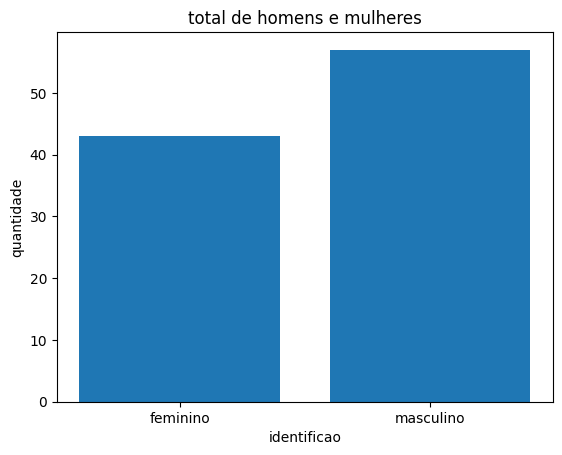

In [ ]:
arq = pd.read_csv("/content/patients.csv.gz")
df = pd.DataFrame(arq)

df['gender'] = df['gender'].replace({'F':1})
df['gender'] = df['gender'].replace({'M':0})

feminino = (df['gender']==1).sum()
masculino = (df['gender']==0).sum()

plt.bar(['feminino','masculino'],[feminino,masculino])
plt.xlabel('identificao')
plt.ylabel('quantidade')
plt.title('total de homens e mulheres')
plt.show()

##Limpeza da base

a gente fez exatamente isso no ORANGE

In [ ]:
arq=pd.read_csv("/content/prescriptions.csv.gz")
arq.head()

,subject_id,hadm_id,pharmacy_id,poe_id,poe_seq,order_provider_id,starttime,stoptime,drug_type,drug,...,gsn,ndc,prod_strength,form_rx,dose_val_rx,dose_unit_rx,form_val_disp,form_unit_disp,doses_per_24_hrs,route
0,10027602,28166872,27168639,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Fentanyl Citrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,10027602,28166872,40720238,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Fentanyl Citrate,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,10027602,28166872,62845687,NaN,NaN,NaN,2201-10-31 12:00:00,NaN,MAIN,Lorazepam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,10027602,28166872,24340150,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Midazolam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,10027602,28166872,14435820,NaN,NaN,NaN,2201-10-30 12:00:00,NaN,MAIN,Midazolam,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


a tabela de medicamentos com apenas colunas que importam:

In [ ]:
selecionar_colunas = ['subject_id','hadm_id','pharmacy_id','drug']
tabela1 = pd.read_csv('/content/prescriptions.csv.gz', usecols = selecionar_colunas)
tabela1.head()

,subject_id,hadm_id,pharmacy_id,drug
0,10027602,28166872,27168639,Fentanyl Citrate
1,10027602,28166872,40720238,Fentanyl Citrate
2,10027602,28166872,62845687,Lorazepam
3,10027602,28166872,24340150,Midazolam
4,10027602,28166872,14435820,Midazolam


a tabela de procedimentos apenas com as colunas relevantes:

In [ ]:
arq = pd.read_csv("/content/diagnoses_icd.csv.gz")
arq.head()

,subject_id,hadm_id,seq_num,icd_code,icd_version
0,10035185,22580999,3,4139,9
1,10035185,22580999,10,V707,9
2,10035185,22580999,1,41401,9
3,10035185,22580999,9,3899,9
4,10035185,22580999,11,V8532,9


tabela com as colunas importantes:

In [ ]:
selecionar_colunas = ['subject_id','hadm_id','icd_code','icd_version']
tabela3 = pd.read_csv('/content/diagnoses_icd.csv.gz', usecols = selecionar_colunas)
tabela3.head()

,subject_id,hadm_id,icd_code,icd_version
0,10035185,22580999,4139,9
1,10035185,22580999,V707,9
2,10035185,22580999,41401,9
3,10035185,22580999,3899,9
4,10035185,22580999,V8532,9


In [ ]:
arq = pd.read_csv("/content/patients.csv.gz")
arq.head()         #dod = data que o paciente morreu

,subject_id,gender,anchor_age,anchor_year,anchor_year_group,dod
0,10014729,F,21,2125,2011 - 2013,NaN
1,10003400,F,72,2134,2011 - 2013,2137-09-02
2,10002428,F,80,2155,2011 - 2013,NaN
3,10032725,F,38,2143,2011 - 2013,2143-03-30
4,10027445,F,48,2142,2011 - 2013,2146-02-09


eliminando a coluna dod pois nao e importante fica:

In [ ]:
selecionar_colunas = ['subject_id','gender','anchor_age','anchor_year_group','anchor_year']
tabela4 = pd.read_csv('/content/patients.csv.gz',usecols=selecionar_colunas)
tabela4.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group
0,10014729,F,21,2125,2011 - 2013
1,10003400,F,72,2134,2011 - 2013
2,10002428,F,80,2155,2011 - 2013
3,10032725,F,38,2143,2011 - 2013
4,10027445,F,48,2142,2011 - 2013


colocando a coluna "gender" para binario:

In [ ]:
df = pd.DataFrame(tabela4)
df['gender']=df['gender'].replace({'F':1,'M':0})
df.head()

,subject_id,gender,anchor_age,anchor_year,anchor_year_group
0,10014729,1,21,2125,2011 - 2013
1,10003400,1,72,2134,2011 - 2013
2,10002428,1,80,2155,2011 - 2013
3,10032725,1,38,2143,2011 - 2013
4,10027445,1,48,2142,2011 - 2013


#Material de estudo:

- informacoes da base: https://www.google.com/search?client=firefox-b-d&q=mimic+iv
- mais sobre a ferramenta orange: https://medium.com/ensina-ai/machine-learning-sem-c%C3%B3digo-636d1a8f9081
- introducao a machine learning com python *O'reilly*: https://www.nrigroupindia.com/e-book/Introduction%20to%20Machine%20Learning%20with%20Python%20(%20PDFDrive.com%20)-min.pdf
